# IDS - Data and Plotting

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- Opening the CSV file and converting the `Unix` timestamp to human-readable time string

In [ ]:
dataframe = pd.read_csv('./data/dataset.csv', sep=';')

dataframe['formatted_date'] = pd.to_datetime(dataframe['timestamp'], unit='s')

dataframe

- Calculating NMSE and MAPE

In [ ]:
NMSE = dataframe['packetsMean'].values - dataframe['packetsTotalSize'].values
NMSE = np.square(NMSE)
NMSE = np.sum(NMSE)
NMSE = NMSE / len(dataframe['packetsMean'].values)
NMSE = np.sqrt(NMSE)
NMSE = NMSE / np.mean(dataframe['packetsTotalSize'].values)
NMSE = round(NMSE, 2)

MAPE = dataframe['packetsMean'].values - dataframe['numberOfPackets'].values
MAPE = np.abs(MAPE)
MAPE = MAPE / dataframe['numberOfPackets'].values
MAPE = np.sum(MAPE)
MAPE = MAPE / len(dataframe['packetsMean'].values)
MAPE = MAPE * 100
MAPE = round(MAPE, 2)

- Calculating the SMA with a sliding window of size 10

In [ ]:
window_size = 10
dataframe['SMA'] = dataframe['packetsTotalSize'].rolling(window=window_size).mean()
dataframe.dropna(inplace=True)

- Creating and customizing the final plot

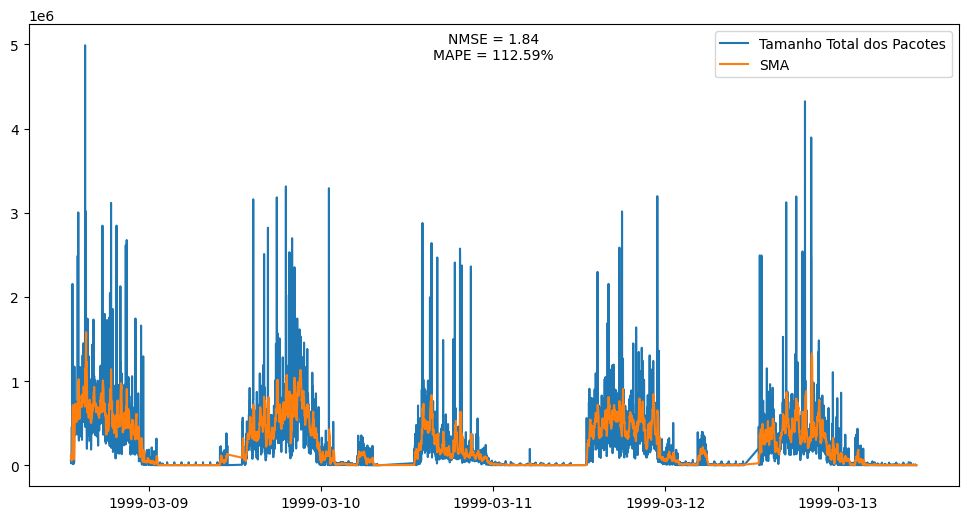

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dataframe['formatted_date'], dataframe['packetsTotalSize'], label='Tamanho Total dos Pacotes')
ax.plot(dataframe['formatted_date'], dataframe['SMA'], label='SMA')
ax.text(0.5, 0.95, f'NMSE = {NMSE}\nMAPE = {MAPE}%', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend()
plt.show()